In [ ]:
# 모듈선언
import json
import cv2
import matplotlib.pyplot as plt

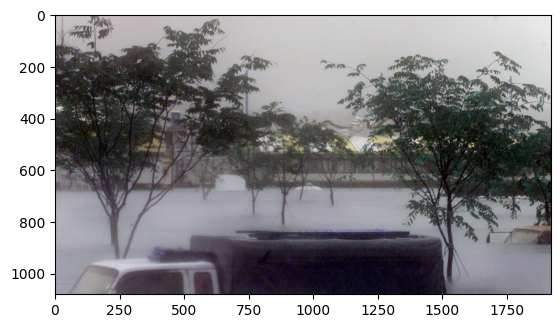

In [ ]:
# 원본 이미지 불러오기
image_path = '/content/03_03_11_6000003.jpg'
image = cv2.imread(image_path)

plt.imshow(image)

In [ ]:
# json 불러오기
# Load the JSON file containing object annotations
json_path = '/content/03_03_11_6000003.json'
with open(json_path, 'r') as f:
    annotations = json.load(f)

In [ ]:
annotations.keys()

dict_keys(['info', 'images', 'annotations', 'categories', 'licenses'])

In [ ]:
annotations['info']

{'description': 'FLOOD Dataset',
 'version': '1.8.0',
 'year': 2022,
 'contributor': 'Smartcoop Consortium',
 'date_created': '2022/02/08'}

In [ ]:
annotations['images']

[{'id': 459367,
  'width': 1920,
  'height': 1080,
  'code': '3030311',
  'file_name': '03_03_11_6000003.jpg',
  'device': 'camera'}]

In [ ]:
annotations['annotations']

[{'id': 1,
  'iscrowd': 0,
  'image_id': 459367,
  'supercategory': 'common',
  'category_id': 30311,
  'category': 'common_tree_level2',
  'segmentation': [[1511.69,
    1017.66,
    1522.6,
    910.13,
    1480.52,
    824.42,
    1458.7,
    813.51,
    1446.23,
    804.16,
    1438.44,
    788.57,
    1419.74,
    766.75,
    1407.27,
    779.22,
    1394.81,
    794.81,
    1379.22,
    808.83,
    1363.64,
    825.97,
    1349.61,
    815.06,
    1341.82,
    808.83,
    1357.4,
    779.22,
    1369.87,
    763.64,
    1371.43,
    757.4,
    1357.4,
    748.05,
    1360.52,
    734.03,
    1369.87,
    716.88,
    1382.34,
    716.88,
    1396.36,
    723.12,
    1405.71,
    716.88,
    1407.27,
    707.53,
    1391.69,
    709.09,
    1377.66,
    698.18,
    1374.55,
    688.83,
    1374.55,
    674.81,
    1341.82,
    648.31,
    1312.21,
    646.75,
    1296.62,
    623.38,
    1298.18,
    596.88,
    1268.57,
    579.74,
    1243.64,
    578.18,
    1232.73,
    590.65,


In [ ]:
annotations['categories']

[{'id': 30311,
  'name': 'common_tree_level2',
  'supercategory': 'common',
  'labelId': '3030311'},
 {'id': 30319,
  'name': 'common_flood damaged area_level2',
  'supercategory': 'common',
  'labelId': '3030319'}]

In [ ]:
annotations['licenses']

[{'id': 1,
  'name': 'Copyright 2021 National Information Society Agency. All Rights Reserved.',
  'url': 'https://www.nia.or.kr/'}]

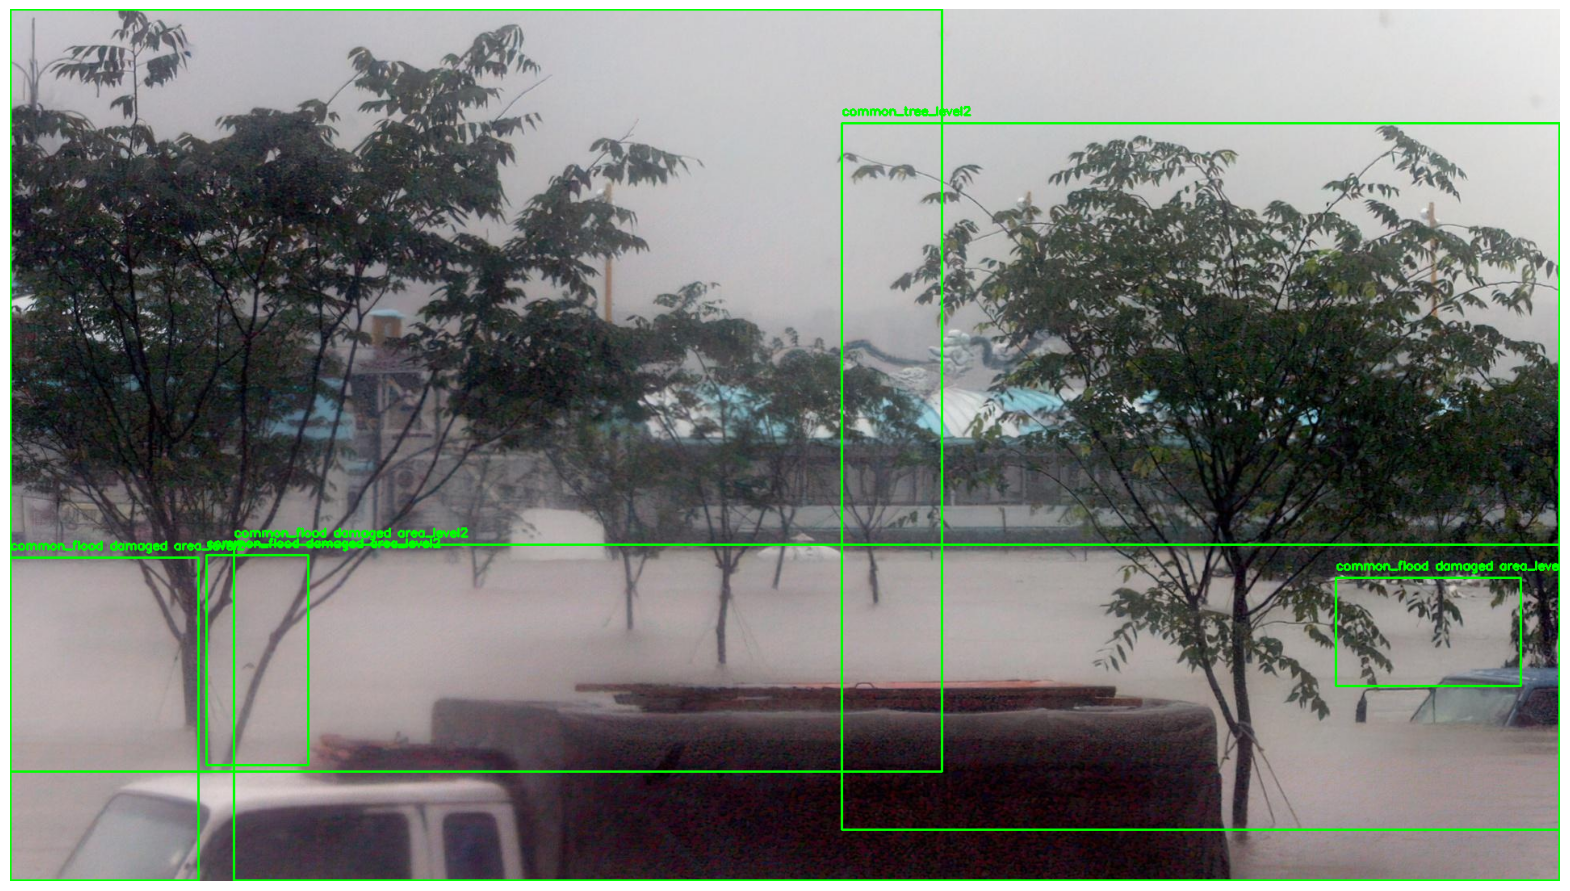

In [ ]:
# 바운딩 좌표를 가져와서 원본이미지에 바운딩 표시

for annotation in annotations['annotations']:
  segmentation = annotation['segmentation'][0]
  bbox = annotation['bbox']
    # Convert the coordinates to integer values (assuming they are float values)
  segmentation = [(int(coord), int(segmentation[i + 1])) for i, coord in enumerate(segmentation) if i % 2 == 0]
  bbox = [int(coord) for coord in bbox]

  # Draw a rectangle around the object on the image
  x, y, w, h = bbox
  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
  cv2.putText(image, annotation['category'], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Show the annotated image
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
# https://copycoding.tistory.com/150 - 폴리곤 참고 사이트

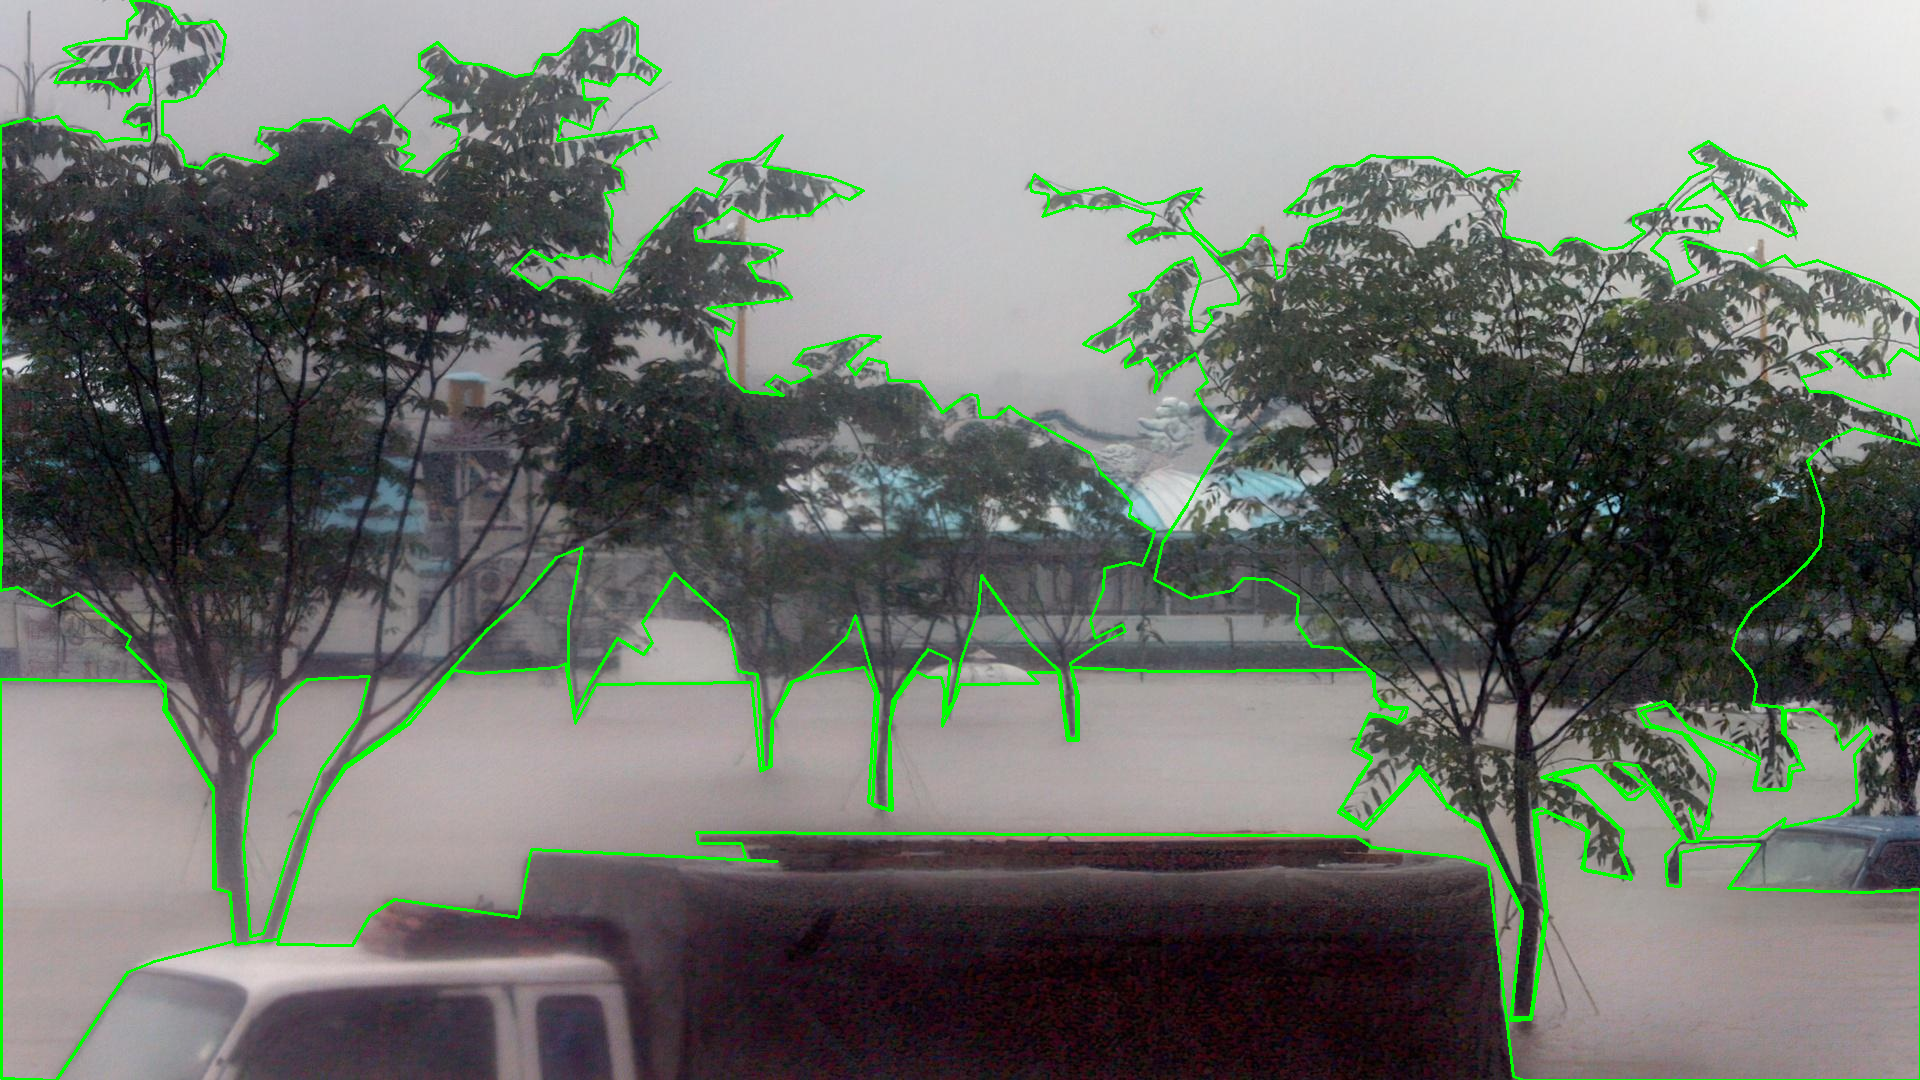

In [ ]:
# 폴리곤 형식으로 보는 이미지

# 모듈 선언
import cv2
import json
from google.colab.patches import cv2_imshow # 코랩에서 cv2로 이미지 확인
import numpy as np

# JSON 파일 경로와 원본 이미지 파일 경로 설정
json_file_path = '/content/03_03_11_6000003.json'
image_path = '/content/03_03_11_6000003.jpg'

# JSON 파일 읽기
with open(json_file_path, 'r') as json_file:
    data = json.load(json_file)

# Segmentation 정보 추출 및 폴리곤 그리기
image = cv2.imread(image_path)
for item in data['annotations']:
    if 'segmentation' in item:
        segmentation = item['segmentation']
        if isinstance(segmentation, list):
            for seg in segmentation:
                points = [(int(seg[i]), int(seg[i + 1])) for i in range(0, int(len(seg)), 2)]
                points = [tuple(p) for p in points] # [(),(),...]
                points = np.array(list(map(list,points)), np.int32) # 리스트안에 리스트 형식으로 바꿔줌,[[],[],..]
                # print(points)
                cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2) # 다각형 그리기, isClosed=True(닫힌도형),False(열린도형)
              # cv2.polylines(이미지파일,[좌표점들],도형닫힘유무,색상,선두께)


# 처리된 이미지 표시
cv2_imshow(image) # 이미지 출력
cv2.waitKey(0) # 사용자가 아무 키나 누를 때까지 이미지를 표시합니다.
cv2.destroyAllWindows() # 이미지 창을 닫습니다. - 안 닫으면 계속 열려서 다른 코드 실행해도 이미지 창이 유지됨

# # 처리된 이미지 저장
# output_image_path = 'output_image_with_polygon.jpg'
# cv2.imwrite(output_image_path, image)



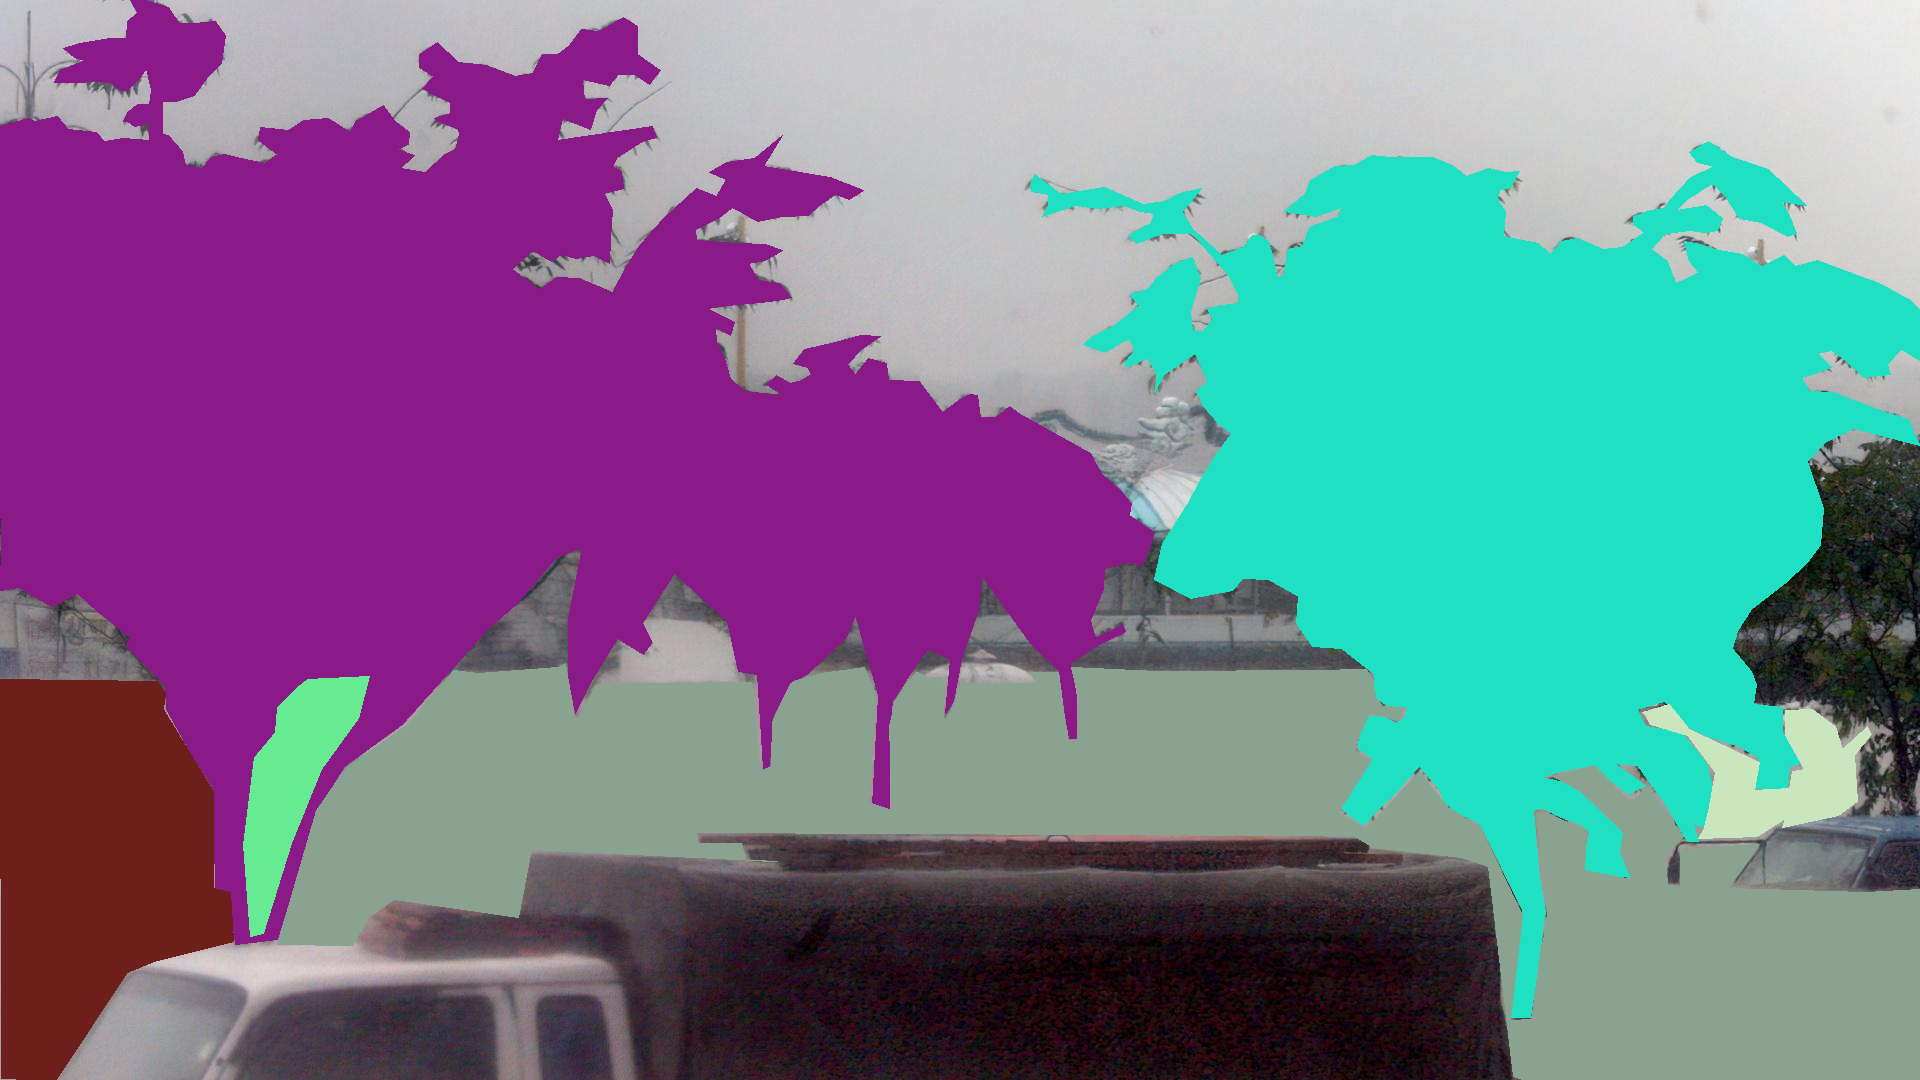

In [ ]:
# 폴리곤 형식으로 보는 이미지

# 모듈 선언
import cv2
import json
from google.colab.patches import cv2_imshow # 코랩에서 cv2로 이미지 확인
import numpy as np

# JSON 파일 경로와 원본 이미지 파일 경로 설정
json_file_path = '/content/03_03_11_6000003.json'
image_path = '/content/03_03_11_6000003.jpg'

# JSON 파일 읽기
with open(json_file_path, 'r') as json_file:
    data = json.load(json_file)

# Segmentation 정보 추출 및 폴리곤 그리기
image = cv2.imread(image_path)
for item in data['annotations']:
    if 'segmentation' in item:
        segmentation = item['segmentation']
        if isinstance(segmentation, list):
            for seg in segmentation:
                points = [(int(seg[i]), int(seg[i + 1])) for i in range(0, int(len(seg)), 2)]
                points = [tuple(p) for p in points] # [(),(),...]
                points = np.array(list(map(list,points)), np.int32) # 리스트안에 리스트 형식으로 바꿔줌,[[],[],..]
                # print(points)
                # cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2) # 다각형 그리기, isClosed=True(닫힌도형),False(열린도형)
              # cv2.polylines(이미지파일,[좌표점들],도형닫힘유무,색상,선두께)
                # 랜덤으로 색 지정
                colors = (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))
                # 폴리곤 안에 종류별로 해서 색으로 구별
                cv2.fillPoly(image, [points],color=colors)

# 처리된 이미지 표시
cv2_imshow(image) # 이미지 출력
cv2.waitKey(0) # 사용자가 아무 키나 누를 때까지 이미지를 표시합니다.
cv2.destroyAllWindows() # 이미지 창을 닫습니다. - 안 닫으면 계속 열려서 다른 코드 실행해도 이미지 창이 유지됨

# # 처리된 이미지 저장
# output_image_path = 'output_image_with_polygon.jpg'
# cv2.imwrite(output_image_path, image)